# Diabetes Prediction


## import libraries

In [134]:
import pandas as pd                           #panda is a dataframe library
import numpy as np                                  # numpy provides n-D object supprt
import matplotlib.pyplot as plt                     #plots data

#do plotting inline instead of separate window
%matplotlib inline

## load and review data

In [135]:
df = pd.read_csv("/home/apoorva/Downloads/MachineLearningWithPython-master/Notebooks/data/pima-data.csv")   #load pima data.Adjust path as necessary


In [136]:
df.shape

(768, 10)

In [137]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [138]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [139]:
df.corr()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [140]:
def plot_corr(df, size= 11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize= (size,size) )
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns), corr.columns))
    plt.yticks(range(len(corr.columns), corr.columns))

TypeError: 'Index' object cannot be interpreted as an integer

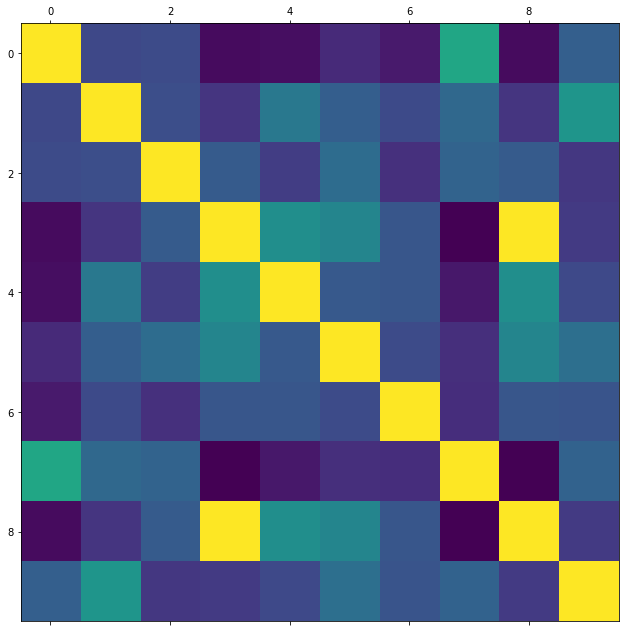

In [142]:
plot_corr(df)

In [143]:
del df['skin']

TypeError: 'Index' object cannot be interpreted as an integer

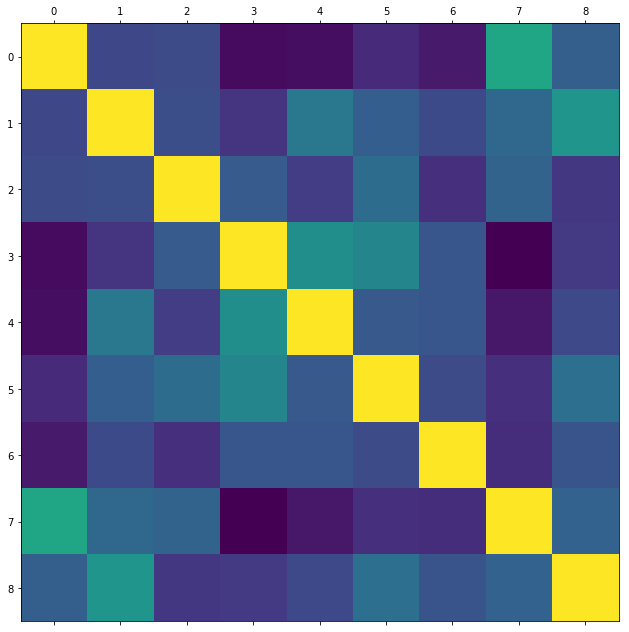

In [144]:
plot_corr(df)


*Mapping* True = 0 
          False = 1

In [145]:
map_dict = {True:1, False:0}
df['diabetes']=df['diabetes'].map(map_dict)


In [146]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check True n False Ratio 

In [147]:
num_true = len(df.loc[df["diabetes"]== True])
num_false = len(df.loc[df["diabetes"]== False])

cent_true = num_true/(num_true + num_false)
cent_false = num_false/(num_true + num_false)
print("% with diabetes({}) = {:.2%}".format(num_true, cent_true))
print("% without diabetes({}) = {:.2%}".format(num_false, cent_false))

% with diabetes(268) = 34.90%
% without diabetes(500) = 65.10%


In [148]:
from sklearn.cross_validation import train_test_split

In [149]:
feature_cols = ["num_preg", "glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "diab_pred", "age"]
target_col = ["diabetes"]
x = df[feature_cols].values
y = df[target_col].values

In [150]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

#### checking %age of training n testing data 

In [151]:
print("The %age of training data({}) is {:.2%}".format(len(X_train), len(X_train)/len(x)))
print("The %age of testing data({}) is {:.2%}".format(len(X_test), len(X_test)/len(x)))

The %age of training data(537) is 69.92%
The %age of testing data(231) is 30.08%


#### checking the True/False ratio in Original, Training, Testing data 

In [152]:
train_cent_true = len(y_train[y_train[:] == 1])/len(y_train)
train_cent_false = len(y_train[y_train[:] == 0])/len(y_train)
test_cent_true = len(y_test[y_test[:] == 1])/len(y_test)
test_cent_false = len(y_test[y_test[:] == 0])/len(y_test)

print("Total observations : {} \n".format(len(df)))
print("ORIGINAL DATA")
print("diabetes(268) = {:0.2%}    NO diabetes(500) = {:0.2%} \n".format(cent_true, cent_false))
print("TRAINING DATA")
print("diabetes({}) = {:0.2%}    NO diabetes({}) = {:0.2%} \n".format(len(y_train[y_train[:] == 1]),train_cent_true,len(y_train[y_train[:] == 0]), train_cent_false))
print("TESTING DATA ")
print("diabetes({}) = {:.2%}    NO diabetes({}) = {:.2%} \n".format(len(y_test[y_test[:] == 1]), test_cent_true,len(y_test[y_test[:] == 0]), test_cent_false))

Total observations : 768 

ORIGINAL DATA
diabetes(268) = 34.90%    NO diabetes(500) = 65.10% 

TRAINING DATA
diabetes(188) = 35.01%    NO diabetes(349) = 64.99% 

TESTING DATA 
diabetes(80) = 34.63%    NO diabetes(151) = 65.37% 



# POST-SPLIT data preparation
## Check for null values 
### i.e. invalid zeroes

In [153]:
print("Total Observations: {}".format(len(df)))
print("0's in glucose_conc: {}".format(len(df.loc[df['glucose_conc']== 0])))
print("0's in diastolic_bp: {}".format(len(df.loc[df['diastolic_bp']== 0])))
print("0's in thickness: {}".format(len(df.loc[df['thickness']== 0])))
print("0's in insulin: {}".format(len(df.loc[df['insulin']== 0])))
print("0's in bmi: {}".format(len(df.loc[df['bmi']== 0])))
print("0's in diab_pred: {}".format(len(df.loc[df['diab_pred']== 0])))

Total Observations: 768
0's in glucose_conc: 5
0's in diastolic_bp: 35
0's in thickness: 227
0's in insulin: 374
0's in bmi: 11
0's in diab_pred: 0


## Imputing
Common practice for removing missing data
-  replace with mean/median/mode
-  replace with expert knowledge derived value

In [154]:
# Scikit learn has imputer class which makes imputing easy
from sklearn.preprocessing import Imputer
fill_0 = Imputer( missing_values = 0, strategy = "mean", axis = 0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)
# We chould calculate the mean of test n training data separately

# ALGORITHMS
## Training the 1st algorithm : Naive bayes 

In [155]:
from sklearn.naive_bayes import GaussianNB

In [156]:
nb = GaussianNB()
nb.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

## Perfomance on testing data

In [157]:
#predict values using testing data
y_pred = nb.predict(X_test)

#Checking training accuracy
from sklearn import metrics
result = metrics.accuracy_score(y_pred, y_test)
"Training Accuracy = {:.2%}".format(result)

'Training Accuracy = 73.59%'

In [158]:
train_cent_true = len(y_train[y_train[:] == 1])/len(y_train)
train_cent_false = len(y_train[y_train[:] == 0])/len(y_train)
test_cent_true = len(y_test[y_test[:] == 1])/len(y_test)
test_cent_false = len(y_test[y_test[:] == 0])/len(y_test)

print("Total observations : {} \n".format(len(df)))
print("ORIGINAL DATA")
print("diabetes(268) = {:0.2%}    NO diabetes(500) = {:0.2%} \n".format(cent_true, cent_false))
print("TRAINING DATA")
print("diabetes({}) = {:0.2%}    NO diabetes({}) = {:0.2%} \n".format(len(y_train[y_train[:] == 1]),train_cent_true,len(y_train[y_train[:] == 0]), train_cent_false))
print("TESTING DATA ")
print("diabetes({}) = {:.2%}    NO diabetes({}) = {:.2%} \n".format(len(y_test[y_test[:] == 1]), test_cent_true,len(y_test[y_test[:] == 0]), test_cent_false))

Total observations : 768 

ORIGINAL DATA
diabetes(268) = 34.90%    NO diabetes(500) = 65.10% 

TRAINING DATA
diabetes(188) = 35.01%    NO diabetes(349) = 64.99% 

TESTING DATA 
diabetes(80) = 34.63%    NO diabetes(151) = 65.37% 



## Metrics

In [159]:
print("Confusion Matrix!!")
print(metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report!!")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix!!
[[118  33]
 [ 28  52]]

Classification Report!!
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



Aim to increase recall value for 1 to be greater than 70% <br>
here it is 0.65

## Training the 2nd algorithm : Random Forest
Random Forest is ensemble algorithm i.e complex

In [160]:
from sklearn.ensemble import RandomForestClassifier 

In [161]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Perfomance evaluation with Test Data

In [162]:
y_pred = rf.predict(X_test)  #testing model using test data
print("Accuracy score : {:.2%}".format(metrics.accuracy_score(y_pred, y_test)))
print("Confusion Matrix :\n")
print(format(metrics.confusion_matrix(y_pred, y_test)))
print("Classification Report :\n")
print(format(metrics.classification_report(y_pred, y_test)))


Accuracy score : 71.00%
Confusion Matrix :

[[121  37]
 [ 30  43]]
Classification Report :

             precision    recall  f1-score   support

          0       0.80      0.77      0.78       158
          1       0.54      0.59      0.56        73

avg / total       0.72      0.71      0.71       231



#### Perfomance evaluation with Train Data

In [163]:
y_pred = rf.predict(X_train)  #testing model using test data
print("Accuracy score : {:.2%}".format(metrics.accuracy_score(y_pred, y_train)))
print("Confusion Matrix :\n")
print(format(metrics.confusion_matrix(y_pred, y_train)))
print("Classification Report :\n")
print(format(metrics.classification_report(y_pred, y_train)))

Accuracy score : 98.70%
Confusion Matrix :

[[348   6]
 [  1 182]]
Classification Report :

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       354
          1       0.97      0.99      0.98       183

avg / total       0.99      0.99      0.99       537



In [164]:
# Above is the case of overfitting

## Training the 3rd algorithm : Logistic Regression


In [165]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.7, random_state = 42)
lr.fit(X_train, y_train)


/home/apoorva/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Perfomance evaluation with Test Data

In [166]:
y_pred = lr.predict(X_test)
print("Accuracy score : {:.2%}".format(metrics.accuracy_score(y_pred, y_test)))
print("Confusion Matrix :\n")
print(format(metrics.confusion_matrix(y_test, y_pred)))
print("Classification Report :\n")
print(format(metrics.classification_report(y_test, y_pred)))

Accuracy score : 74.46%
Confusion Matrix :

[[128  23]
 [ 36  44]]
Classification Report :

             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



## Handling unbalanced classes
class_weight = "balanced"

****Improving Recall**** <br>
choosing the best 'C'

In [167]:
value = 0.1
C_end = 5
C_values=[]
recall_scores = []
best_recall_score = 0
while (value < C_end):
    C_values.append(value)
    lr = LogisticRegression(C=value,class_weight="balanced",random_state=42)
    lr.fit(X_train, y_train.ravel())
    y_pred = lr.predict(X_test)
    recall_score = metrics.recall_score(y_test, y_pred)
    recall_scores.append(recall_score)
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_y_pred = y_pred
    value+=0.1
        

In [168]:
best_c_value = C_values[recall_scores.index(best_recall_score)]

In [169]:
print("The highest Recall Value {0:.3%} occurs at C = {1:.2f}".format(best_recall_score, best_c_value))

The highest Recall Value 73.750% occurs at C = 0.30


### Plotting C_value vs Recall value

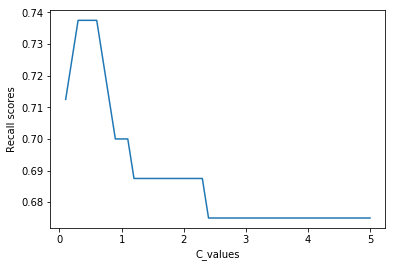

In [206]:
%matplotlib inline
plt.plot(C_values, recall_scores)
plt.xlabel("C_values")
plt.ylabel("Recall scores")
plt.show()

In [171]:
# still recall_value is not greater than 70%
# maybe because True(~35) < False(~65)  

In [172]:
lr = LogisticRegression(C=best_c_value,class_weight="balanced",random_state=42)
lr.fit(X_train, y_train.ravel())
y_pred = lr.predict(X_test)
print("Accuracy score : {:.2%}".format(metrics.accuracy_score(y_pred, y_test)))
print("Confusion Matrix :\n")
print(metrics.confusion_matrix(y_test, y_pred))
print("Classification Report :\n")
print(metrics.classification_report(y_test, y_pred))

Accuracy score : 71.43%
Confusion Matrix :

[[106  45]
 [ 21  59]]
Classification Report :

             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231



## LogisticRegressionCV

In [197]:
from sklearn.linear_model import LogisticRegressionCV
# lr_CV = LogisticRegressionCV(n_jobs = -1,random_state=42,Cs = 3, cv = 10, class_weight="balanced")
lr_CV = LogisticRegressionCV( cv = 10, n_jobs = -1,Cs = 3,class_weight="balanced",refit = False, random_state=42,)

In [203]:
lr_CV.fit(X_train, y_train.ravel())
y_pred_cv = lr_CV.predict(X_test)
#Training metrics
print("Accuracy score : {:.2%}".format(metrics.accuracy_score(y_pred_cv, y_test)))
print("Confusion Matrix :\n")
print(metrics.confusion_matrix(y_test, y_pred_cv))
print("Classification Report :\n")
print(metrics.classification_report(y_test, y_pred_cv))

Accuracy score : 71.43%
Confusion Matrix :

[[110  41]
 [ 25  55]]
Classification Report :

             precision    recall  f1-score   support

          0       0.81      0.73      0.77       151
          1       0.57      0.69      0.62        80

avg / total       0.73      0.71      0.72       231

